In [9]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = data.iloc[: ,3:13]
y = data.iloc[: ,13]

In [14]:
geo     = pd.get_dummies(X['Geography'] ,drop_first=True)
gender  = pd.get_dummies(X['Gender']    ,drop_first=True)

In [15]:
X = pd.concat([X,geo,gender] ,axis=1)
X = X.drop(['Geography','Gender'] ,axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [19]:
model = Sequential()

model.add( Dense(input_shape=(11,) ,units=6 ,kernel_initializer='he_uniform' ,activation='relu') )
model.add(Dropout(0.3))
model.add( Dense(units=6 ,kernel_initializer='he_uniform' ,activation='relu') )
model.add(Dropout(0.3))

model.add( Dense(units=1 ,kernel_initializer='glorot_uniform' ,activation='sigmoid') )

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
               optimizer = 'adam' ,
               loss      = 'binary_crossentropy' ,
               metrics   = ['accuracy']
              )

In [22]:
model_history = model.fit(
                           X_train                             , 
                           y_train                             ,
                           validation_data = (X_test , y_test) ,
                           batch_size = 10                     ,
                           epochs = 100
                         )

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.8683 - accuracy: 0.6510 - val_loss: 0.4967 - val_accuracy: 0.7970
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7764 - val_loss: 0.4820 - val_accuracy: 0.8000
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5050 - accuracy: 0.7941 - val_loss: 0.4716 - val_accuracy: 0.8030
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4964 - accuracy: 0.7974 - val_loss: 0.4670 - val_accuracy: 0.8000
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4849 - accuracy: 0.7993 - val_loss: 0.4534 - val_accuracy: 0.8040
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4715 - accuracy: 0.8002 - val_loss: 0.4412 - val_accuracy: 0.8125
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4700 - accuracy: 0.7994 - val_loss: 0.4411 - val_accuracy: 0.8065

Epoch 58/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4205 - accuracy: 0.8227 - val_loss: 0.4015 - val_accuracy: 0.8185
Epoch 59/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4200 - accuracy: 0.8267 - val_loss: 0.4050 - val_accuracy: 0.8175
Epoch 60/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4186 - accuracy: 0.8227 - val_loss: 0.3989 - val_accuracy: 0.8185
Epoch 61/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4152 - accuracy: 0.8266 - val_loss: 0.3971 - val_accuracy: 0.8190
Epoch 62/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8269 - val_loss: 0.3973 - val_accuracy: 0.8215
Epoch 63/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4172 - accuracy: 0.8254 - val_loss: 0.3965 - val_accuracy: 0.8200
Epoch 64/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4208 - accuracy: 0.8257 - val_loss: 0.3994 - val_accuracy:

In [23]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [24]:
confusion_matrix(y_test, y_pred)

array([[1591,    4],
       [ 358,   47]], dtype=int64)

In [25]:
accuracy_score(y_pred,y_test)

0.819

Text(0.5, 1.0, 'Model Accuracy')

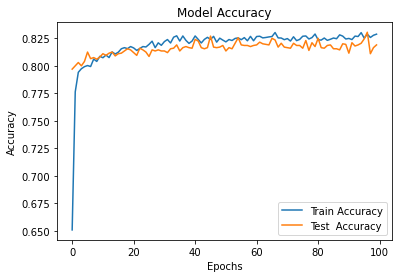

In [27]:
train_acc = model_history.history['accuracy']
val_acc   = model_history.history['val_accuracy']

plt.plot(train_acc ,label='Train Accuracy')
plt.plot(val_acc   ,label='Test  Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

plt.title("Model Accuracy")

Text(0.5, 1.0, 'Model Loss')

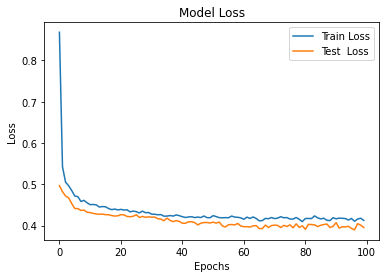

In [28]:
train_loss = model_history.history['loss']
val_loss   = model_history.history['val_loss']

plt.plot(train_loss ,label='Train Loss')
plt.plot(val_loss   ,label='Test  Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.title("Model Loss")